
Importing the Dependencies

In [1]:
pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import scipy.stats as stats
# from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

# ML model
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

Data Collection and Processing

In [3]:
# loading the dataset to pandas DataFrame
rainfall_dataset = pd.read_csv('/content/rainfall_prediction.csv')

In [4]:
type(rainfall_dataset)

pandas.core.frame.DataFrame

In [5]:
# first 5 rows of the dataframe
rainfall_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# last 5 rows of the dataframe
rainfall_dataset.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
# number of rows and columns
rainfall_dataset.shape

(145460, 23)

In [8]:
# the name of the columns of dataframe
rainfall_dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
# Describe the data
rainfall_dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
# Describe the data with transpose
rainfall_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [11]:
# getting imformation about dataset
rainfall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
# number of missing values in each column
rainfall_dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Fill missing values

In [13]:
categorical_features = []
numeric_features = []
features = rainfall_dataset.columns.values.tolist()
for col in features:
    if rainfall_dataset[col].dtype != 'object': 
        numeric_features.append(col)
    else:
        categorical_features.append(col)

print(f'categorical_features: {categorical_features}')
print(f'numeric_features: {numeric_features}')

categorical_features: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
numeric_features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
for col in numeric_features:
    mean = rainfall_dataset[col].mean()
    rainfall_dataset[col] = rainfall_dataset[col].fillna(mean)
    
for col in categorical_features:
    mode = rainfall_dataset[col].mode()[0]
    rainfall_dataset[col] = rainfall_dataset[col].fillna(mode)

rainfall_dataset.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
rainfall_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [16]:
rainfall_dataset.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,23.221348,0.0,5.468232,7.611178,W,40.03523,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.000000,8.00000,15.0,20.9,No,No


Data Visualization

Numerical Features

In [17]:
# pairplot for weather dataset
sns.pairplot(rainfall_dataset)
print('Pairplot for Weather Dataset')

Output hidden; open in https://colab.research.google.com to view.

Histplot in Rainfall Dataset


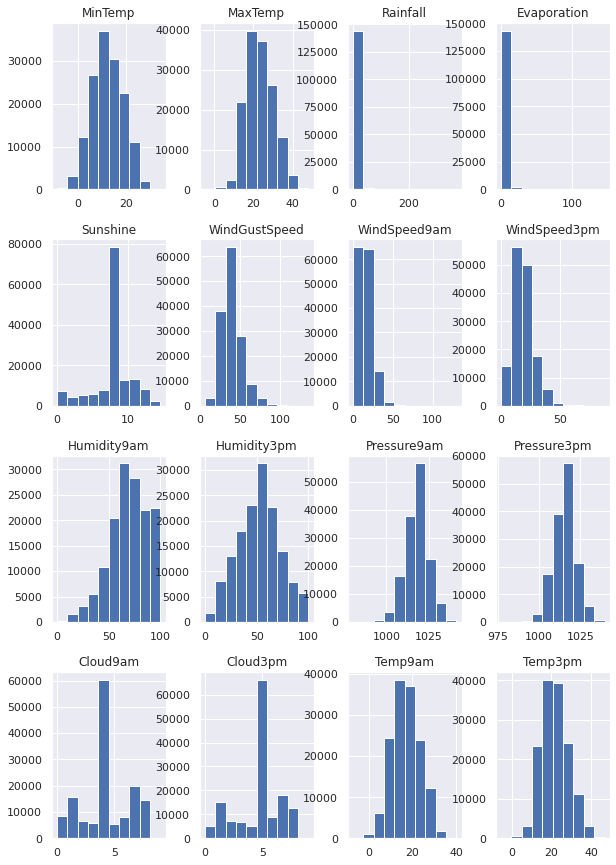

In [18]:
sns.set(style="darkgrid") # hide graph line
rainfall_dataset.hist(figsize=(10,15))
print('Histplot in Rainfall Dataset')
# title = 'Histplot in olympic_dataset\n'.upper()
# plt.title(title, fontsize=20, loc='center')
plt.show()

In [19]:
numeric_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


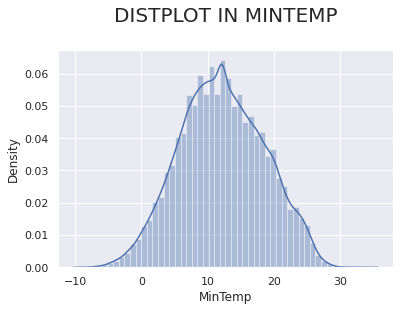

In [20]:
# MinTemp
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['MinTemp'])
title = 'Distplot in MinTemp\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


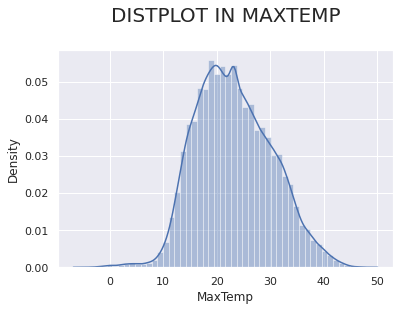

In [21]:
# MaxTemp
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['MaxTemp'])
title = 'Distplot in MaxTemp\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


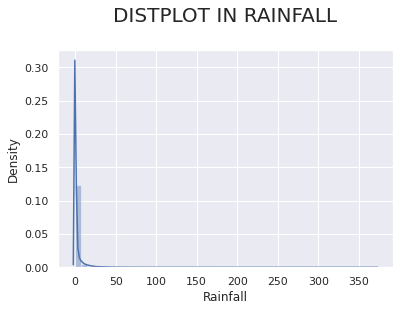

In [22]:
# Rainfall
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Rainfall'])
title = 'Distplot in Rainfall\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


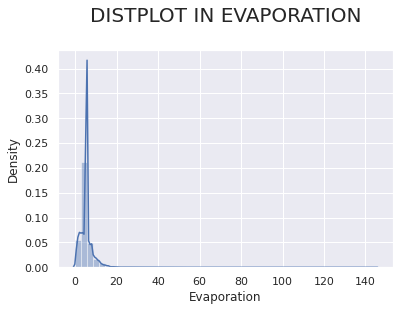

In [23]:
# Evaporation
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Evaporation'])
title = 'Distplot in Evaporation\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


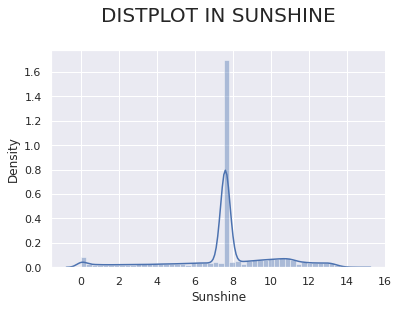

In [24]:
# Sunshine
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Sunshine'])
title = 'Distplot in Sunshine\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


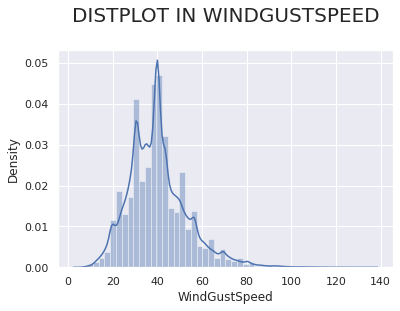

In [25]:
# WindGustSpeed
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['WindGustSpeed'])
title = 'Distplot in WindGustSpeed\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


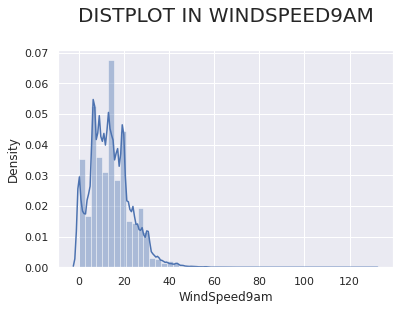

In [26]:
# WindSpeed9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['WindSpeed9am'])
title = 'Distplot in WindSpeed9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


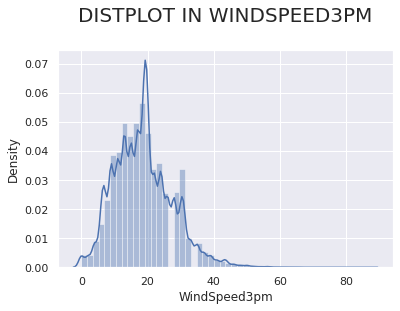

In [27]:
# WindSpeed3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['WindSpeed3pm'])
title = 'Distplot in WindSpeed3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


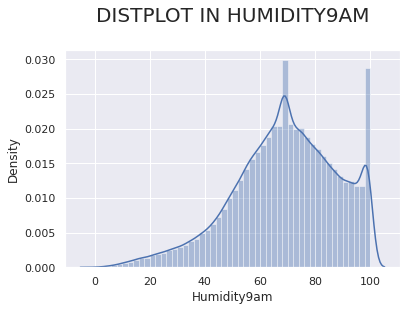

In [28]:
# Humidity9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Humidity9am'])
title = 'Distplot in Humidity9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


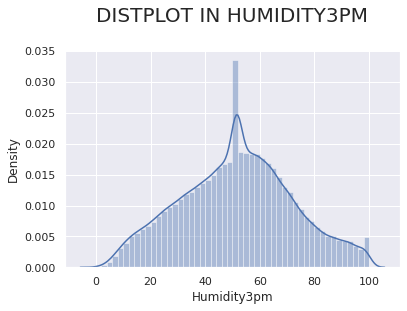

In [29]:
# Humidity3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Humidity3pm'])
title = 'Distplot in Humidity3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


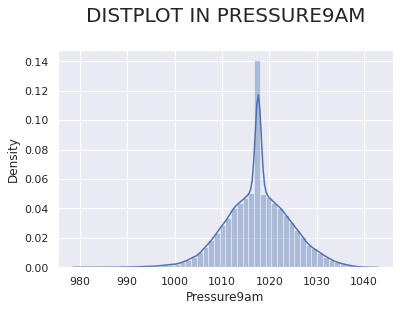

In [30]:
# Pressure9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Pressure9am'])
title = 'Distplot in Pressure9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


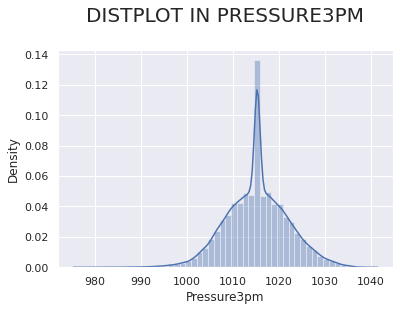

In [31]:
# Pressure3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Pressure3pm'])
title = 'Distplot in Pressure3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


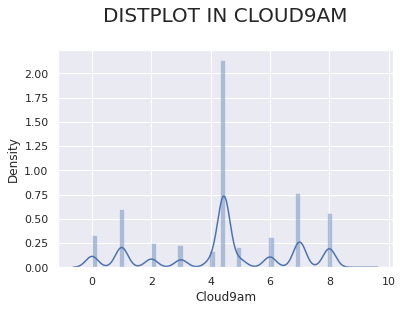

In [32]:
# Cloud9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Cloud9am'])
title = 'Distplot in Cloud9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


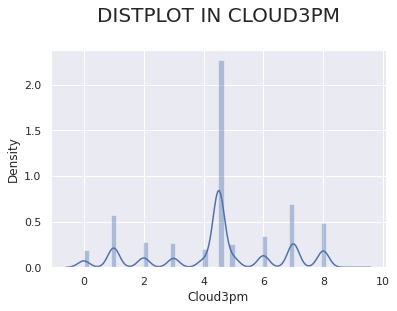

In [33]:
# Cloud3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Cloud3pm'])
title = 'Distplot in Cloud3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


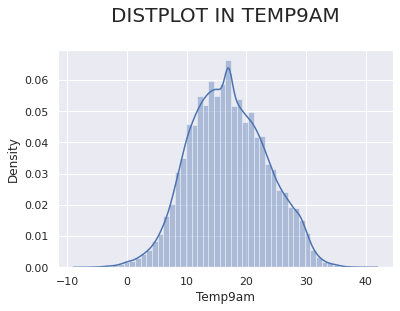

In [34]:
# Temp9am
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Temp9am'])
title = 'Distplot in Temp9am\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


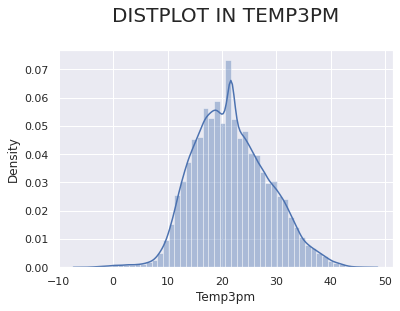

In [35]:
# Temp3pm
plt.figure(figsize=(6,4))
sns.distplot(rainfall_dataset['Temp3pm'])
title = 'Distplot in Temp3pm\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [36]:
# For single one Boxplot
#ax = sns.boxplot(x=rainfall_dataset["RainToday"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

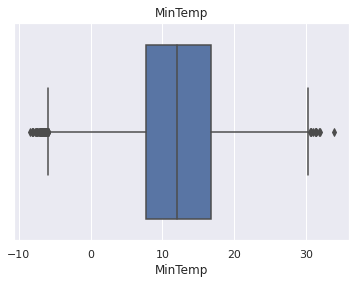

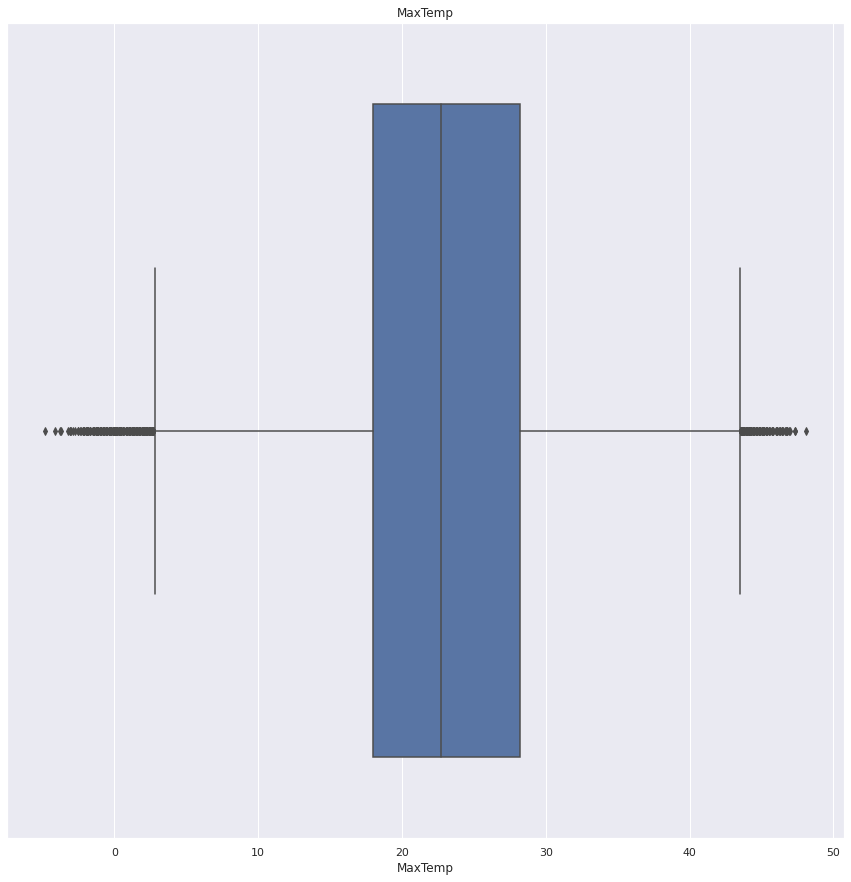

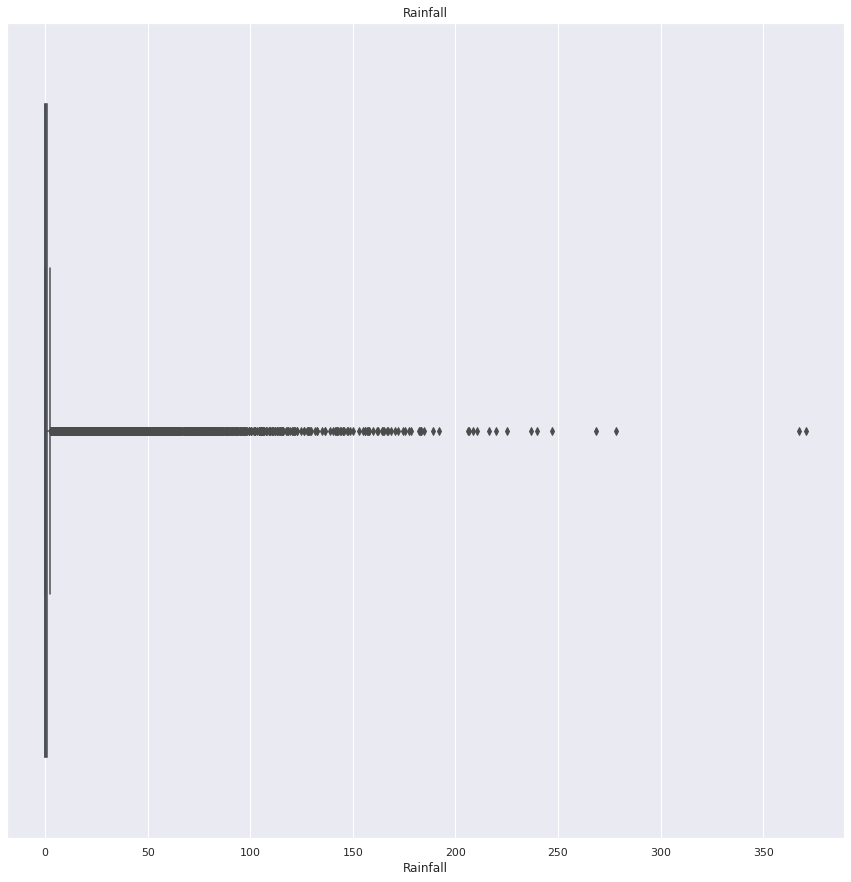

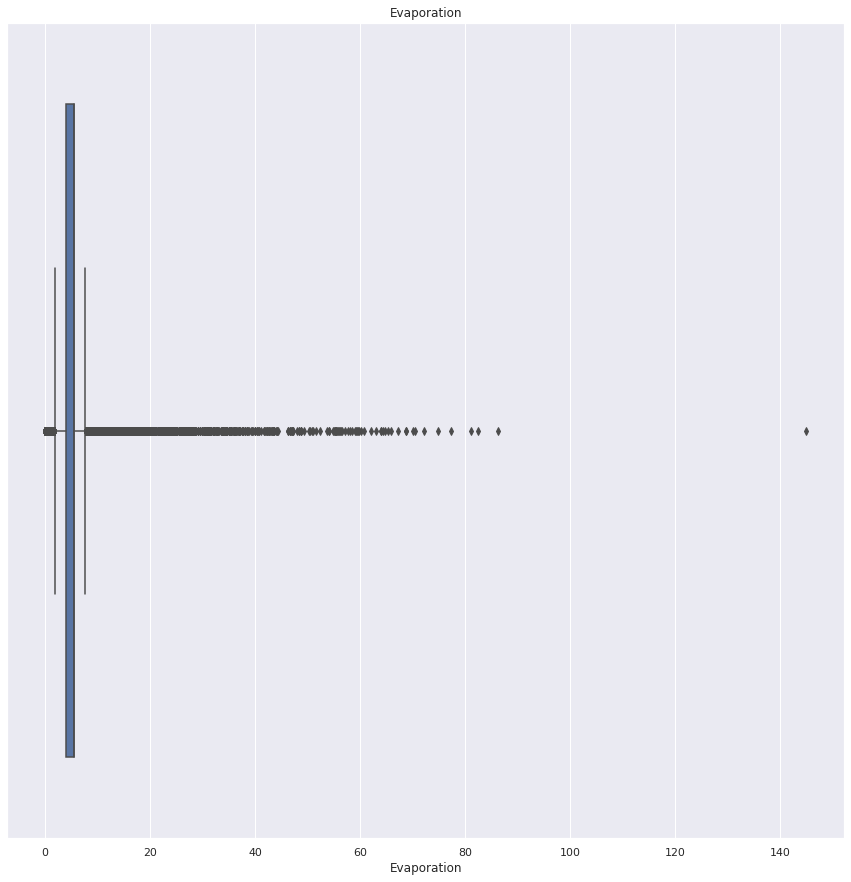

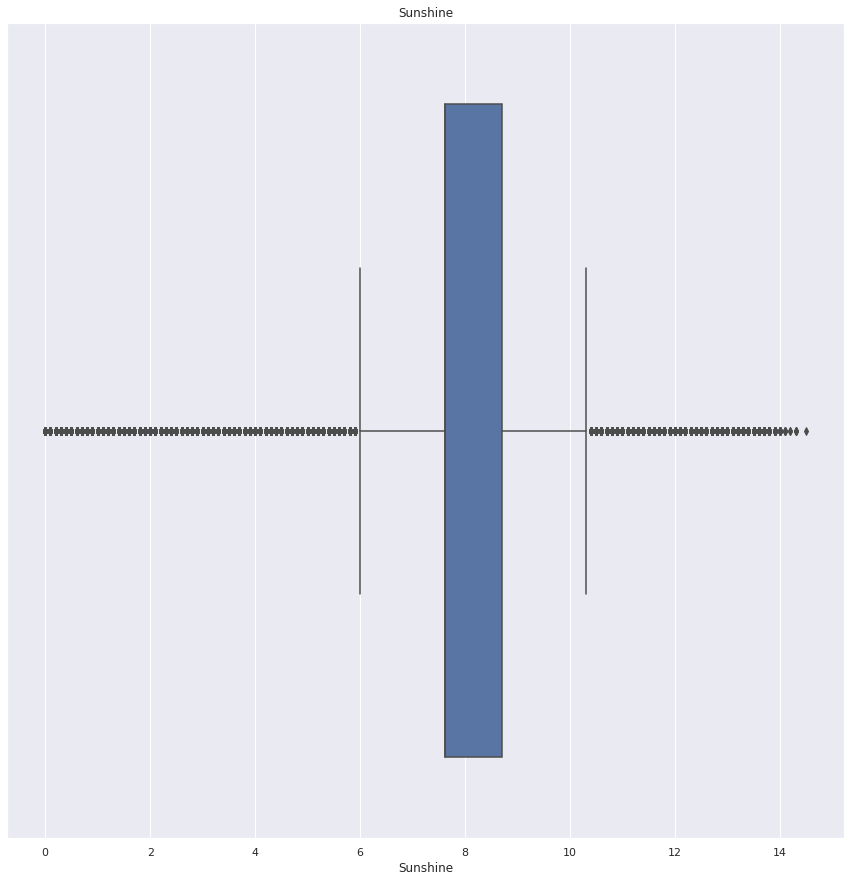

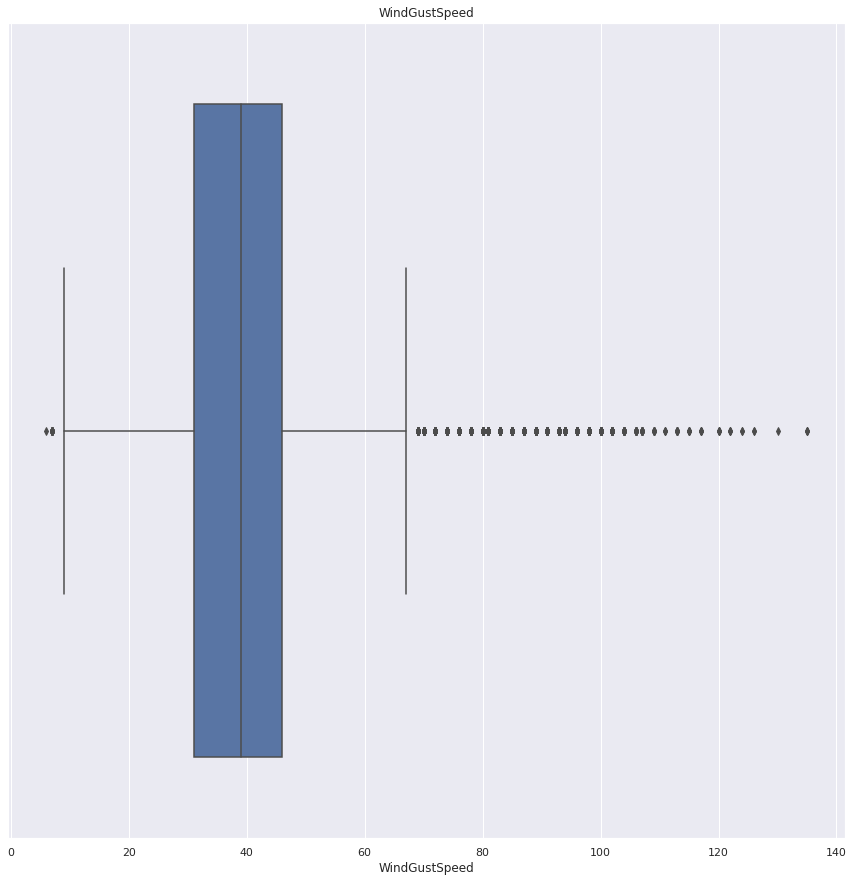

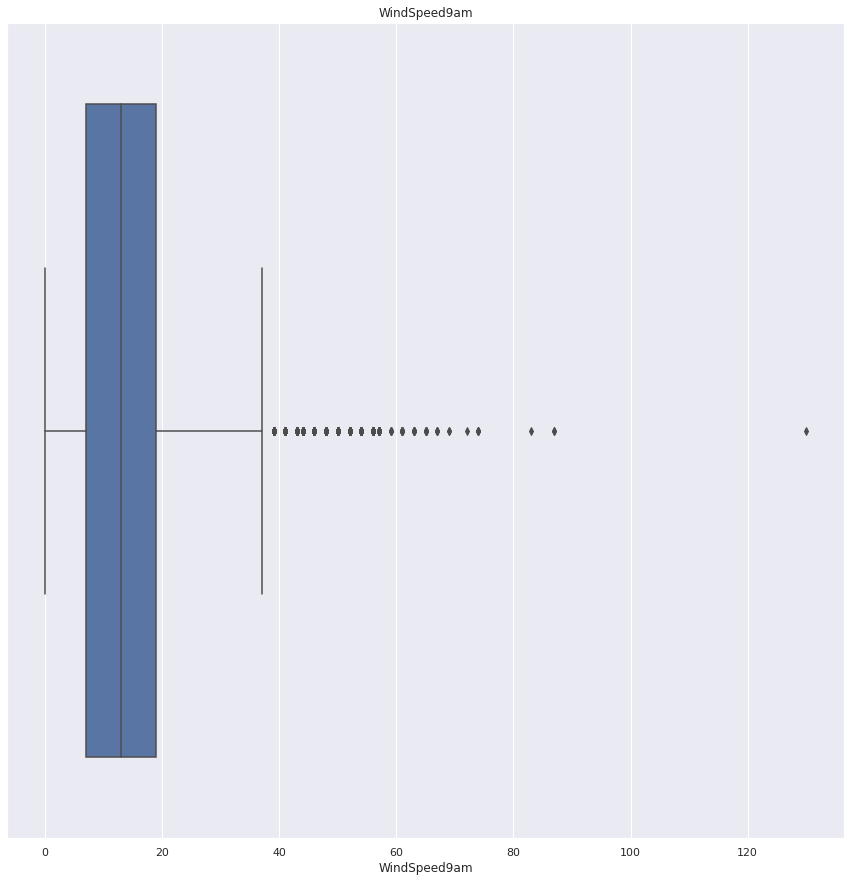

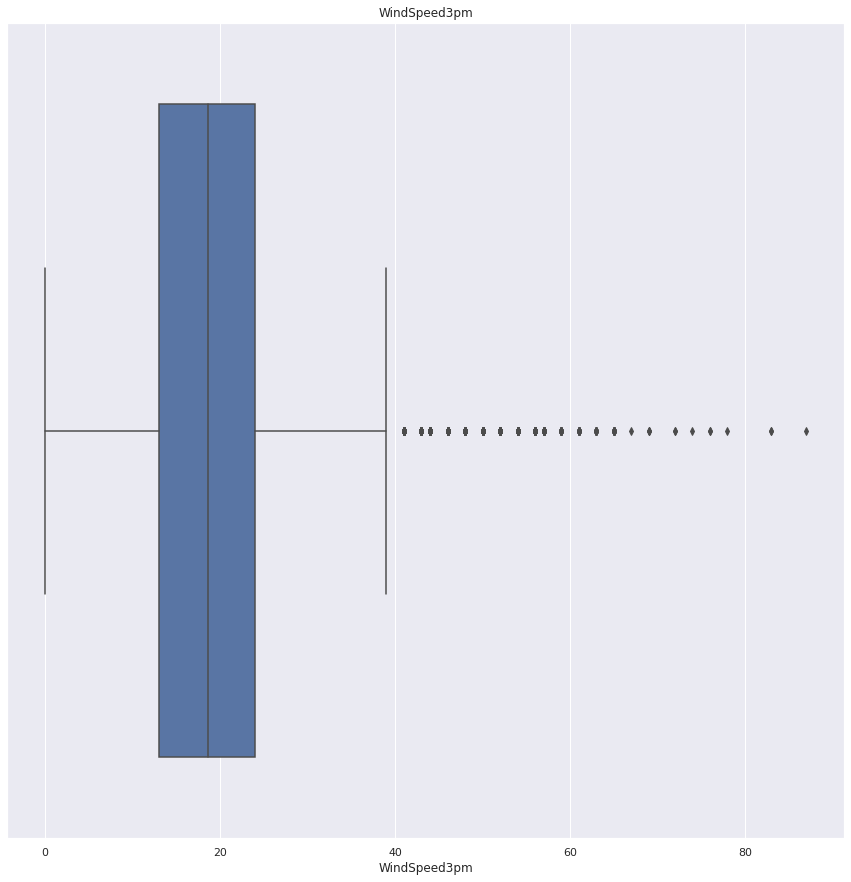

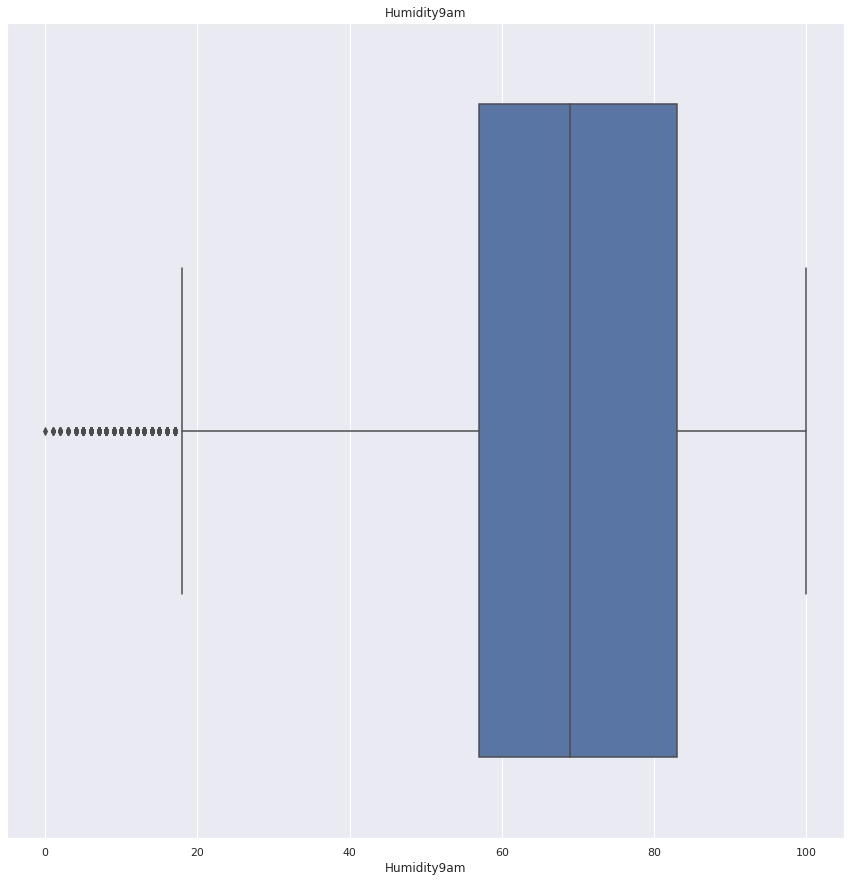

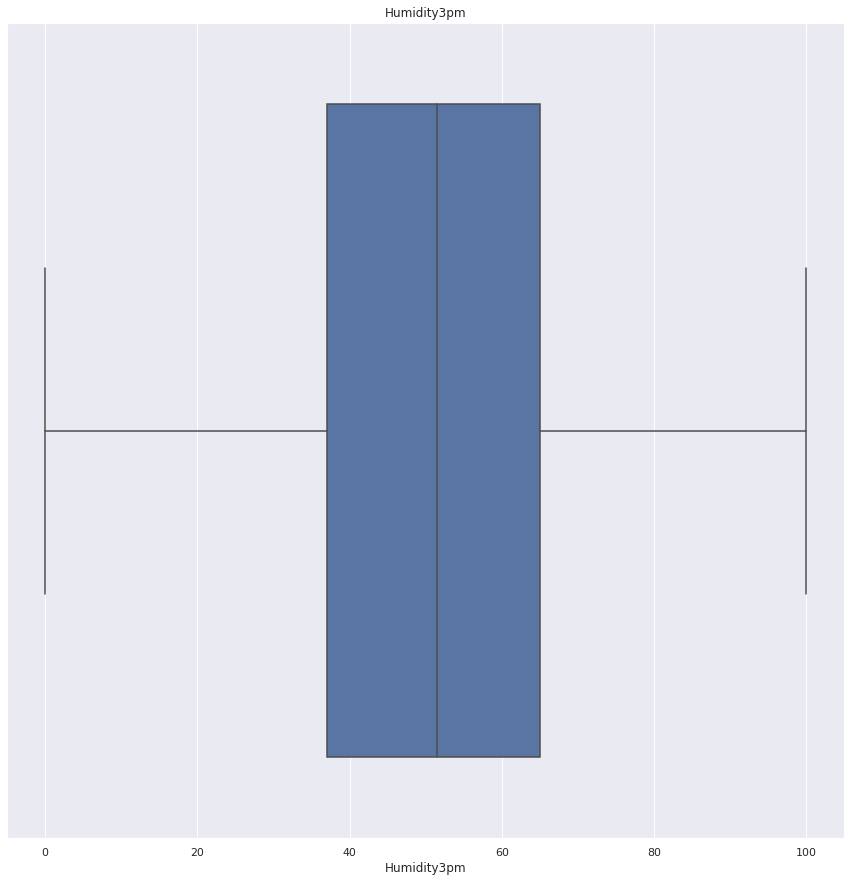

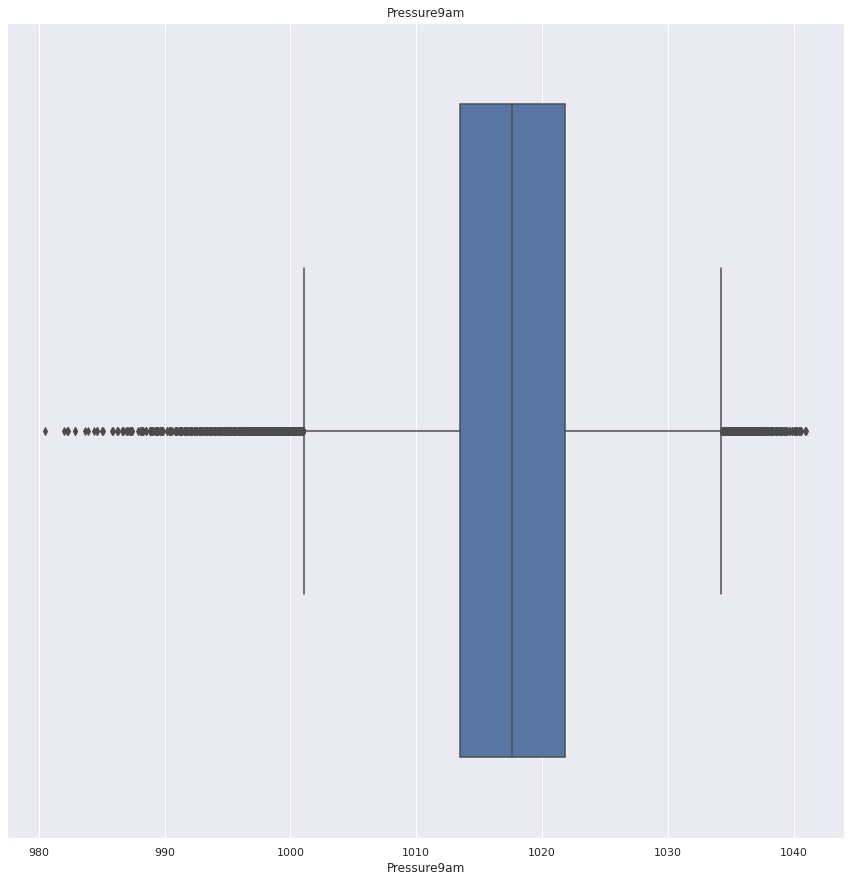

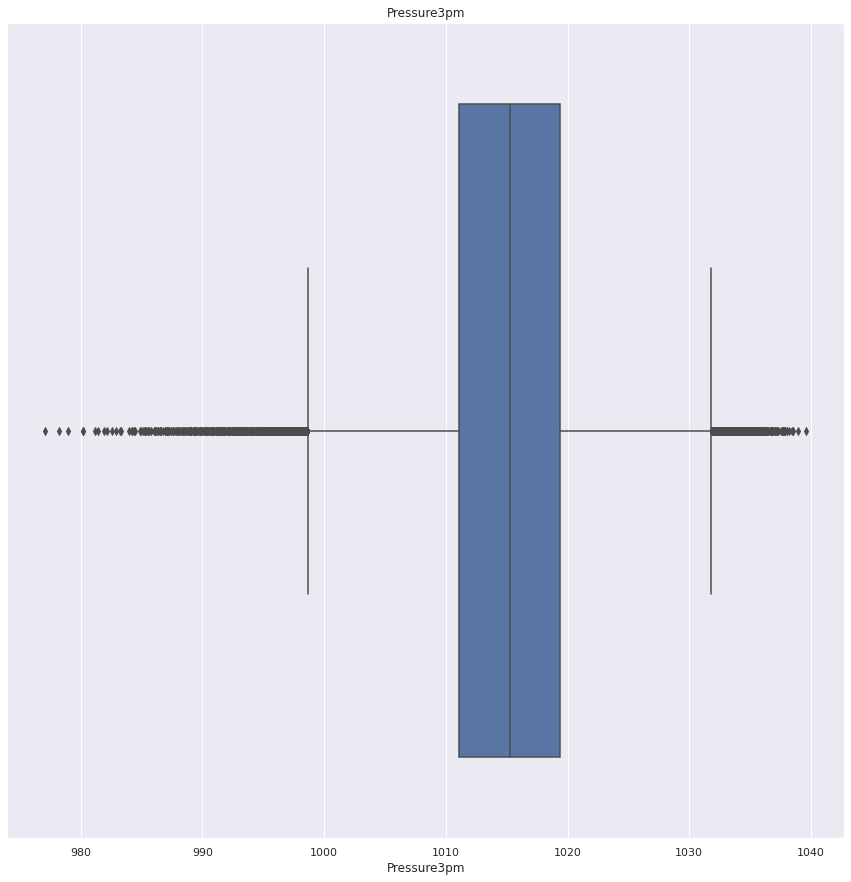

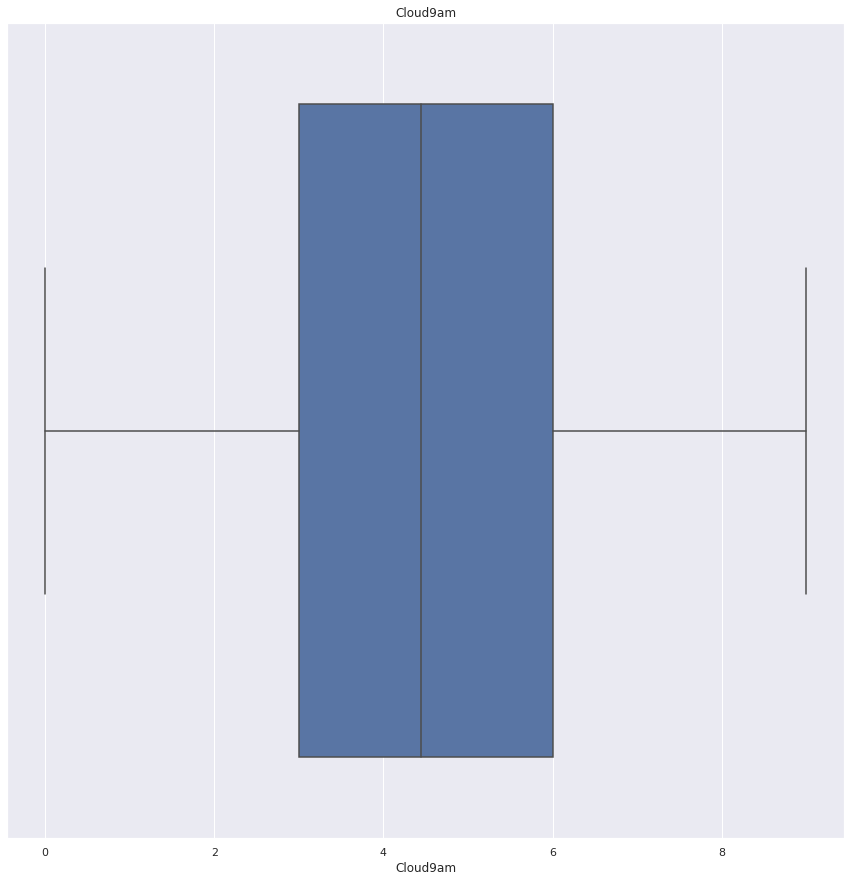

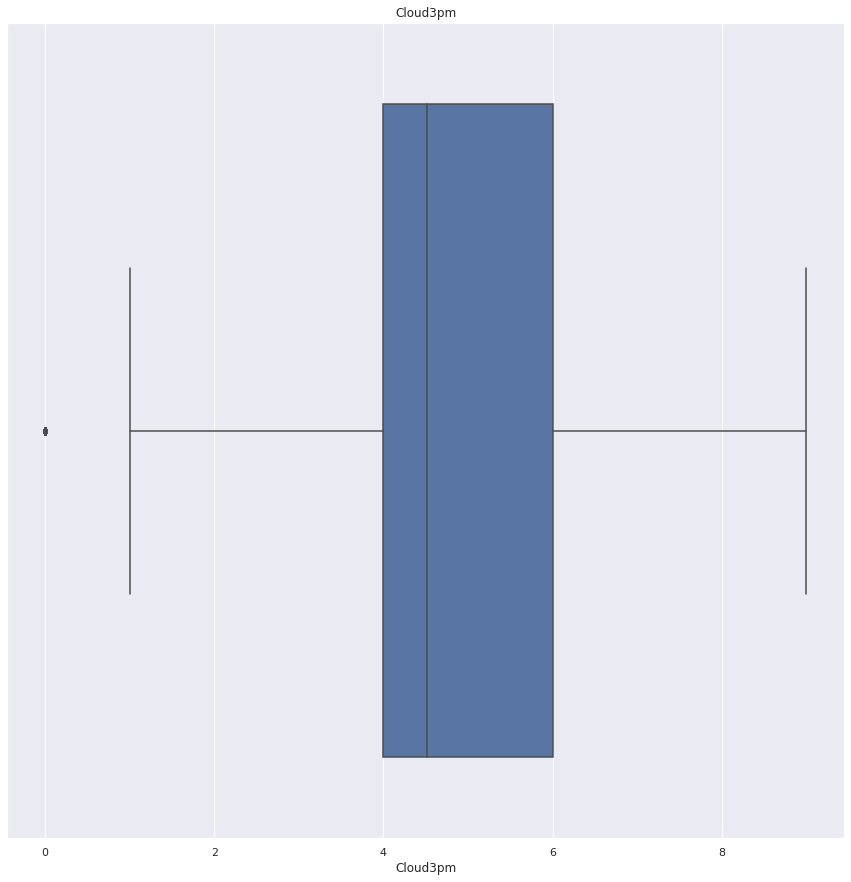

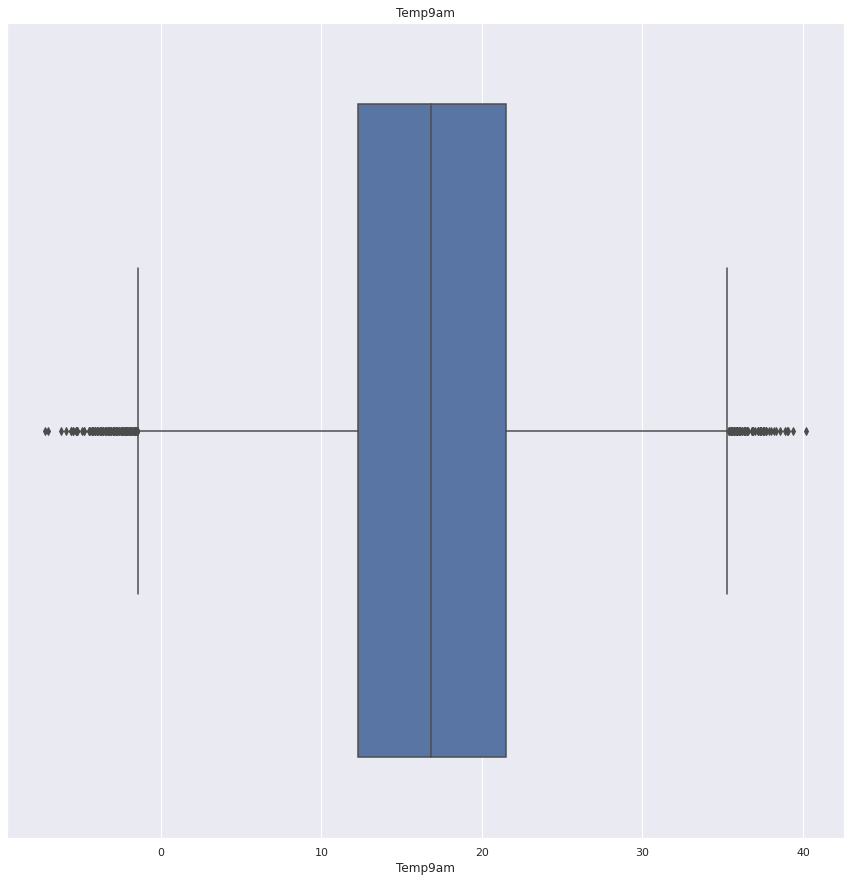

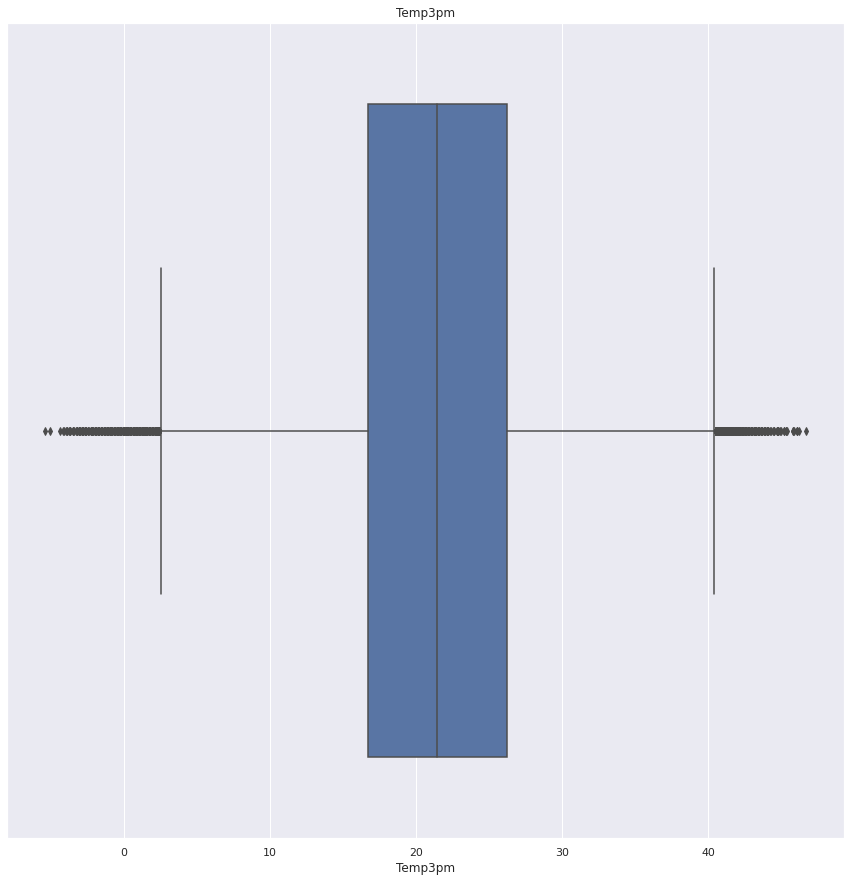

<Figure size 1080x1080 with 0 Axes>

In [37]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in numeric_features:
    data=rainfall_dataset.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

MinTemp


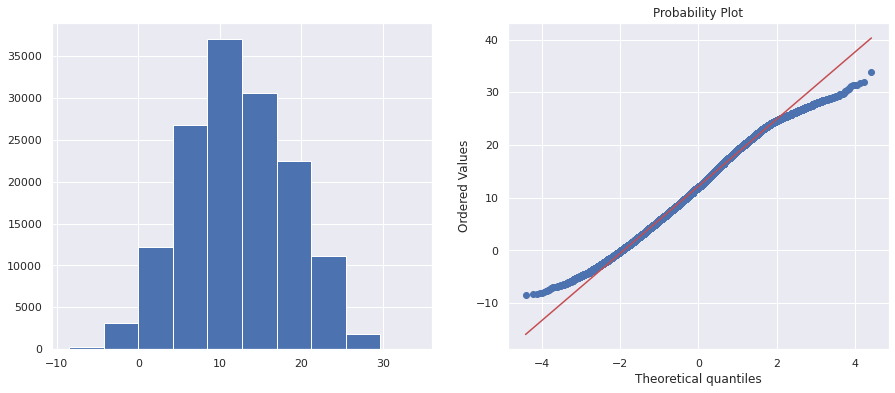

MaxTemp


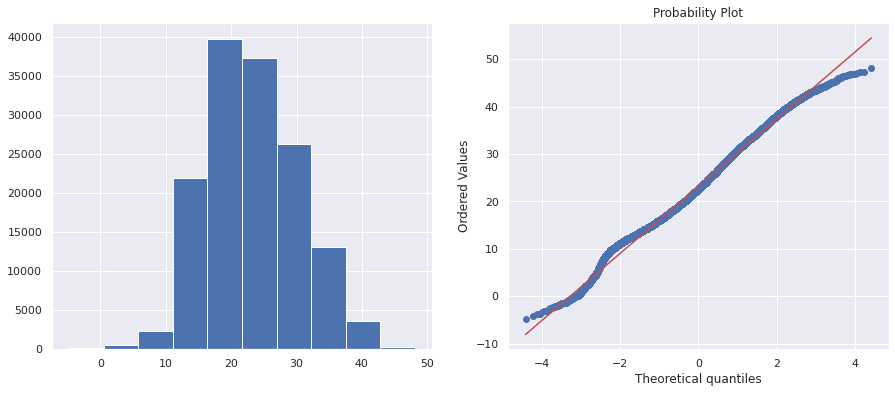

Rainfall


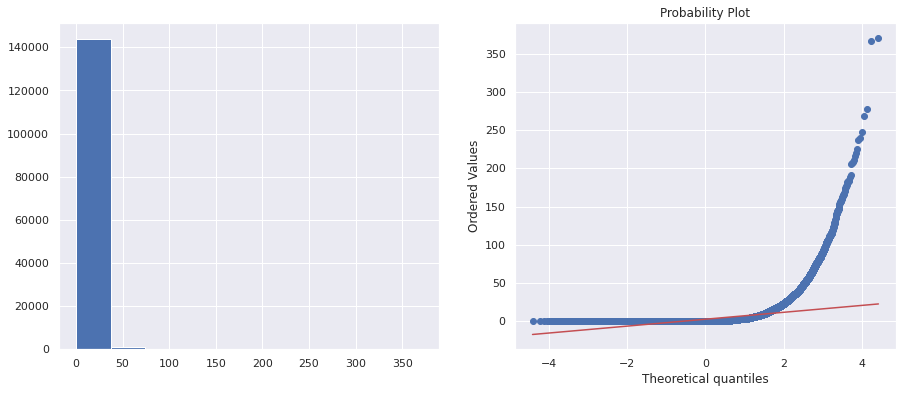

Evaporation


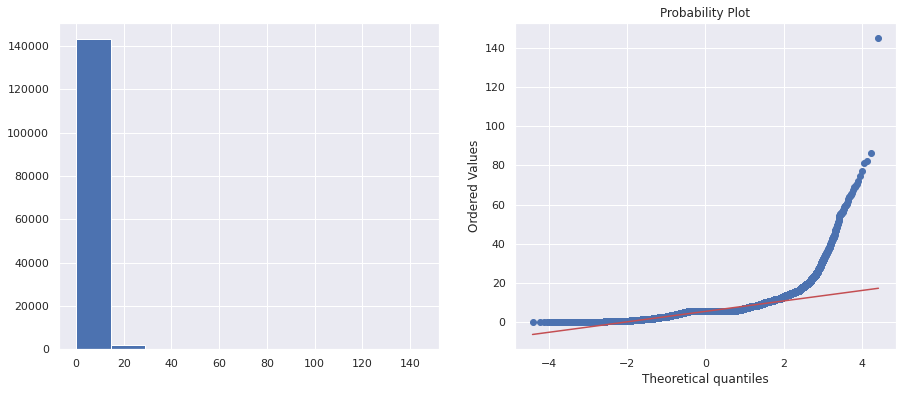

Sunshine


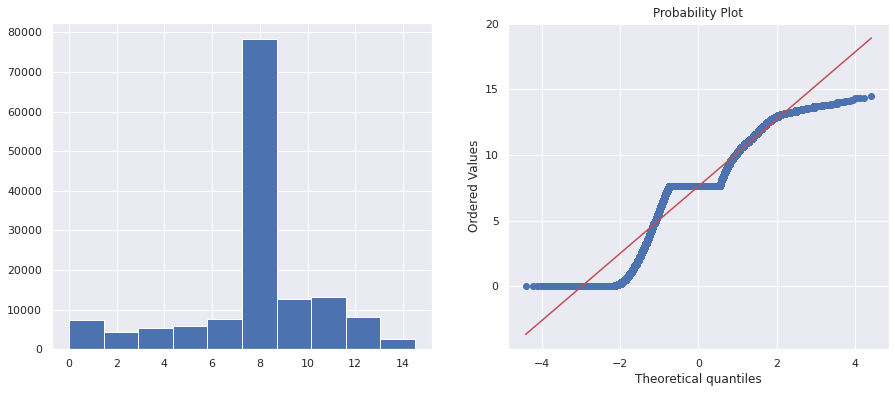

WindGustSpeed


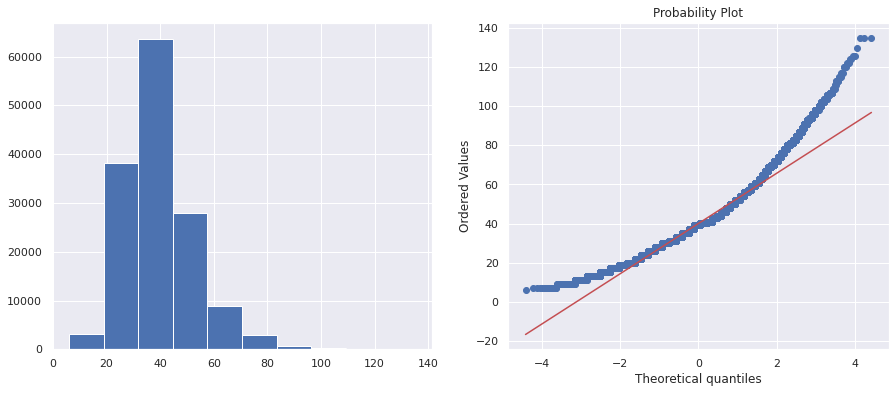

WindSpeed9am


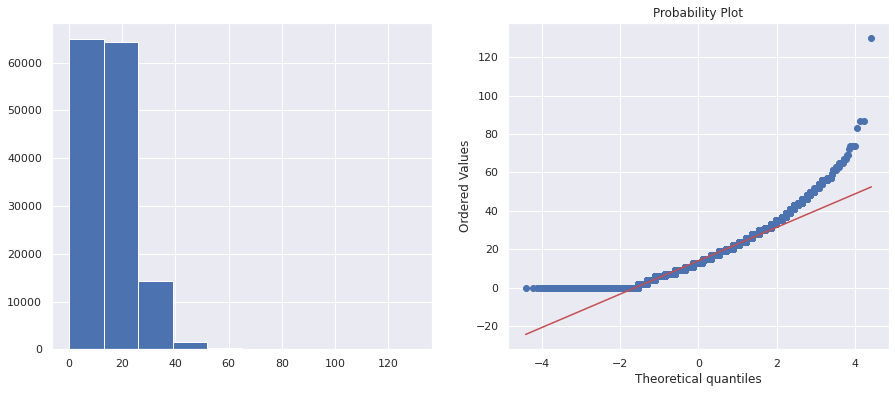

WindSpeed3pm


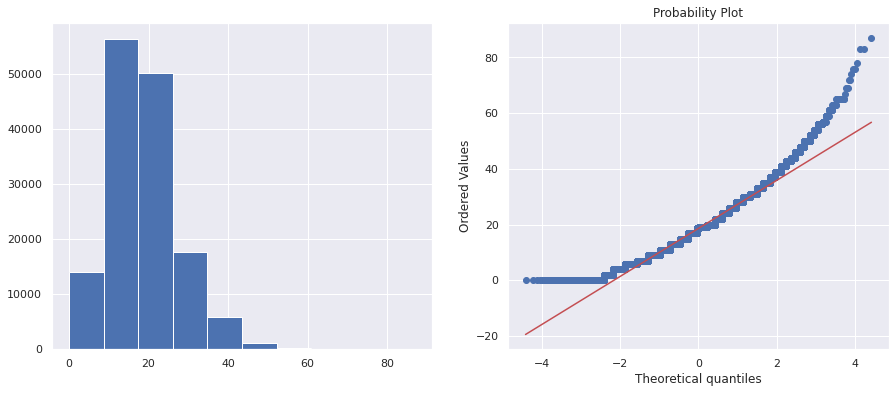

Humidity9am


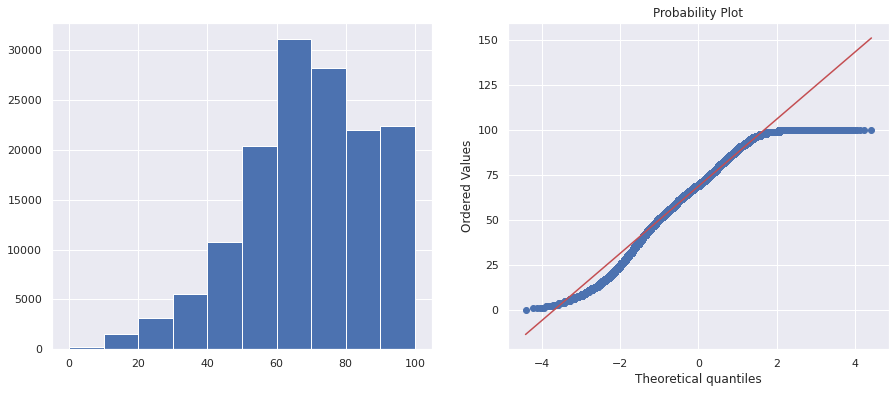

Humidity3pm


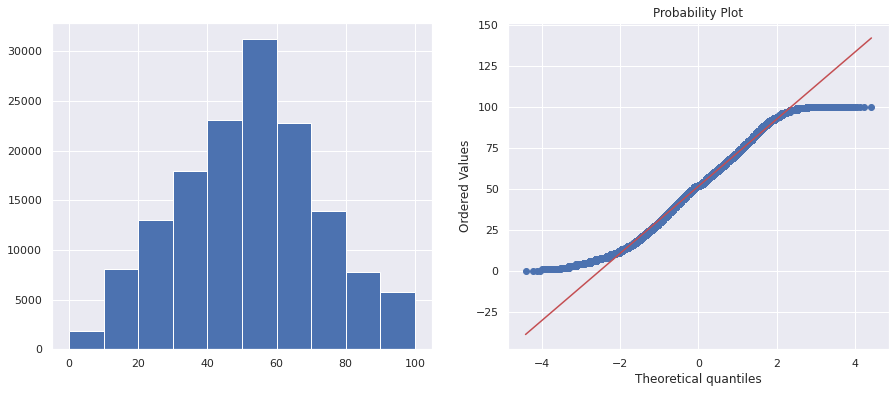

Pressure9am


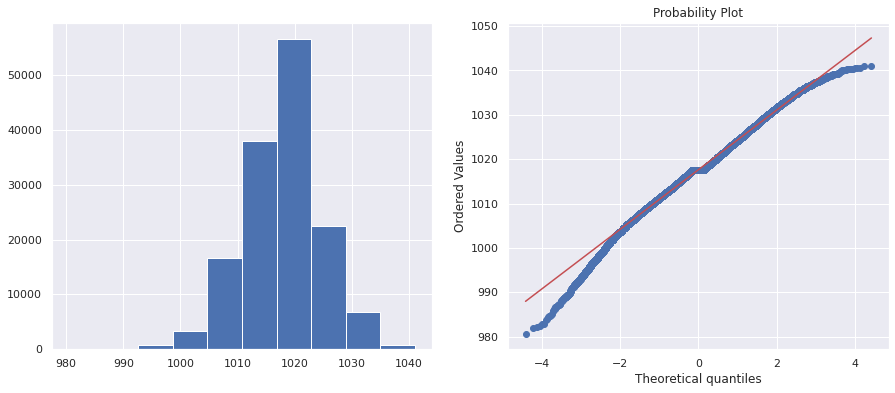

Pressure3pm


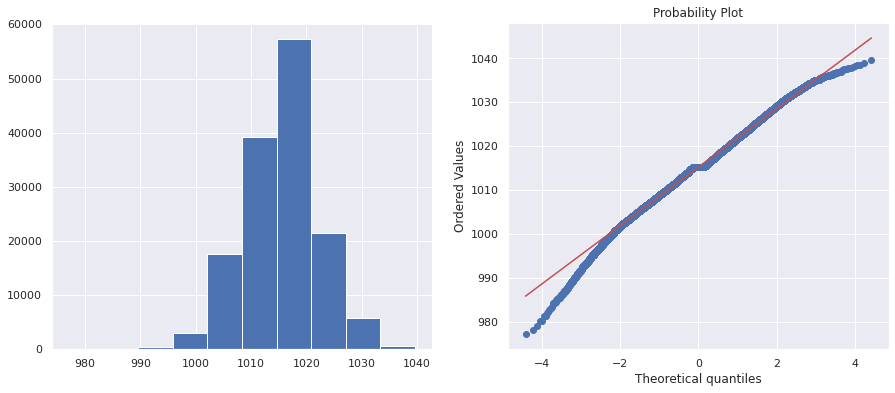

Cloud9am


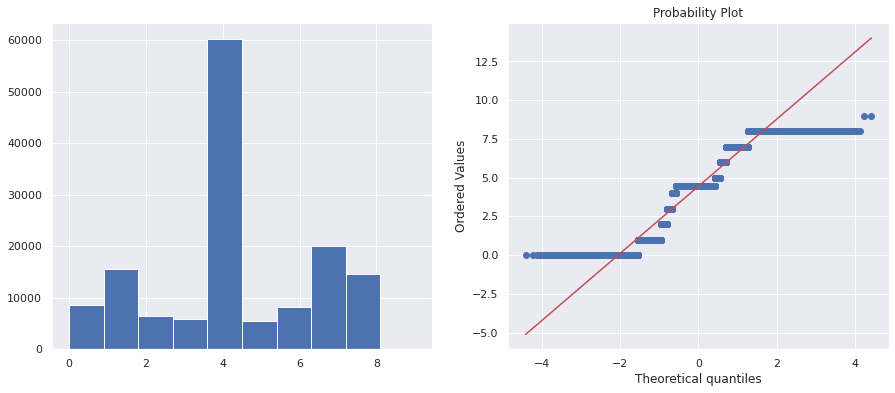

Cloud3pm


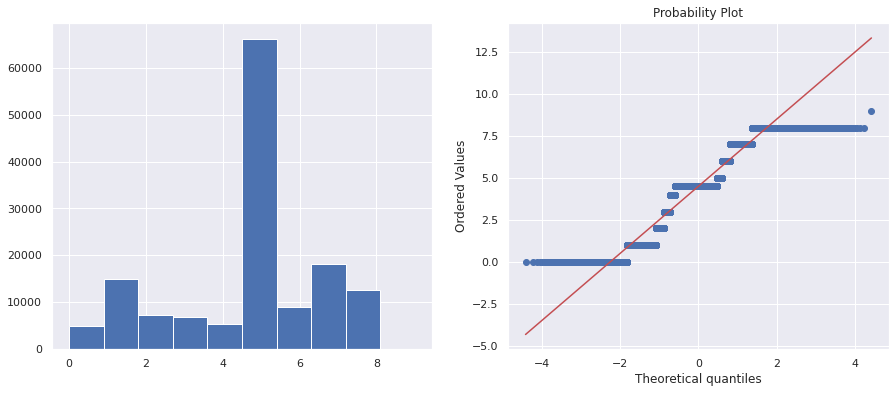

Temp9am


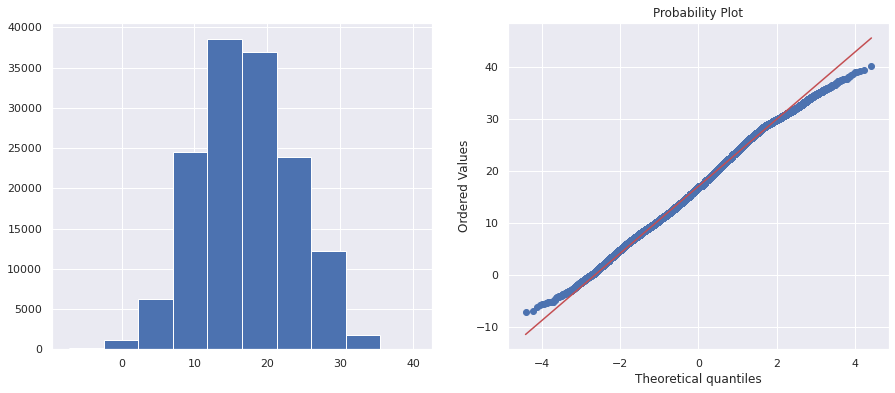

Temp3pm


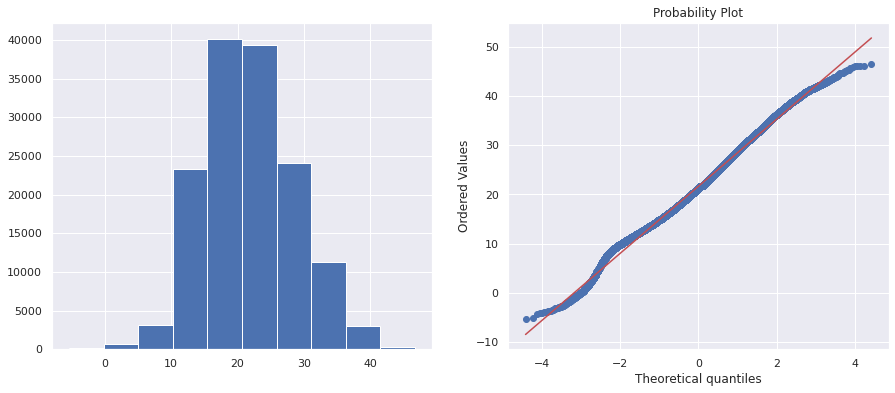

In [38]:
for feature in numeric_features:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    # when you do subplot(1,2,1); or subplot(121); , you would like to have
    # one row and two columns worth of figures. The last number, p=1 means
    # that you wish to place the plot in the left most column.
    rainfall_dataset[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(rainfall_dataset[feature], dist="norm", plot=plt)
    plt.show()

Text(0.5, 1.0, 'Humidity3pm vs Temp3pm of Rainfall Dataset')

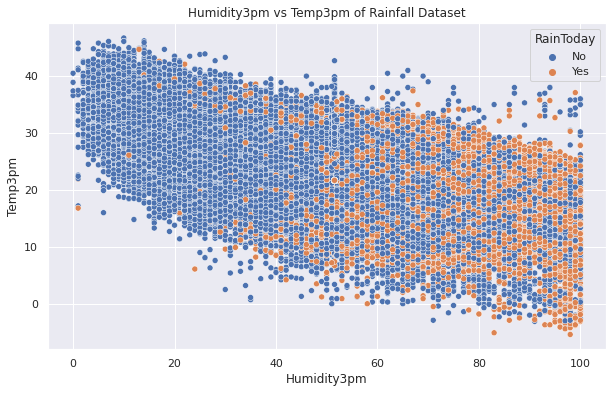

In [39]:
plt.figure(figsize=(10,6))
axis = sns.scatterplot(x='Humidity3pm', y='Temp3pm', data=rainfall_dataset, hue='RainToday')
plt.title('Humidity3pm vs Temp3pm of Rainfall Dataset')

Text(0.5, 1.0, 'Humidity9am vs Temp9am of Rainfall Dataset')

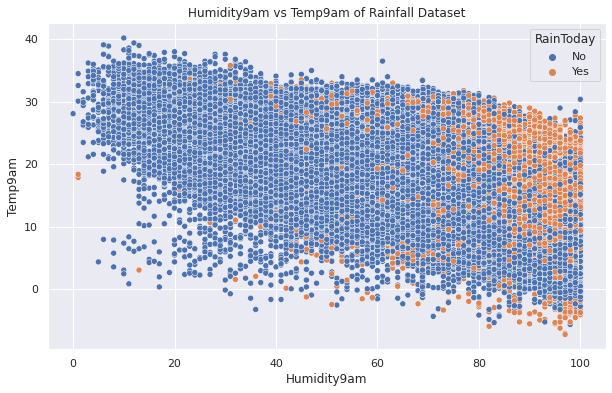

In [40]:
plt.figure(figsize=(10,6))
axis = sns.scatterplot(x='Humidity9am', y='Temp9am', data=rainfall_dataset, hue='RainToday')
plt.title('Humidity9am vs Temp9am of Rainfall Dataset')

Text(0.5, 1.0, 'MaxTemp vs Pressure3pm of Rainfall Dataset')

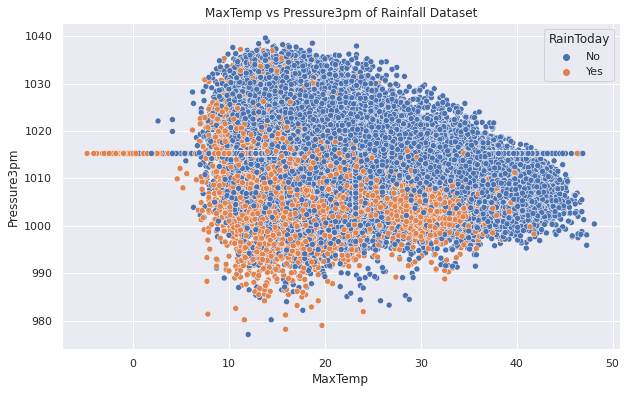

In [41]:
plt.figure(figsize=(10,6))
axis = sns.scatterplot(x='MaxTemp', y='Pressure3pm', data=rainfall_dataset, hue='RainToday')
plt.title('MaxTemp vs Pressure3pm of Rainfall Dataset')

Text(0.5, 1.0, 'MinTemp vs Pressure9am of Rainfall Dataset')

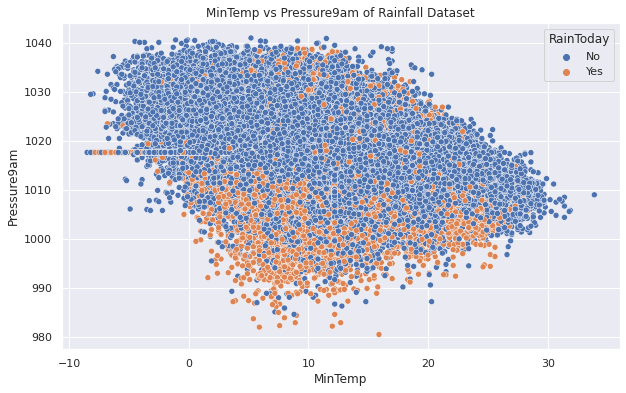

In [42]:
plt.figure(figsize=(10,6))
axis = sns.scatterplot(x='MinTemp', y='Pressure9am', data=rainfall_dataset, hue='RainToday')
plt.title('MinTemp vs Pressure9am of Rainfall Dataset')

Categorical Features

In [43]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [44]:
# Location column values
rainfall_dataset['Location'].value_counts()

Canberra            3436
Sydney              3344
Brisbane            3193
Adelaide            3193
Darwin              3193
Perth               3193
Hobart              3193
Melbourne           3193
Townsville          3040
MountGinini         3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Ballarat            3040
Bendigo             3040
Albany              3040
Cairns              3040
GoldCoast           3040
Albury              3040
Wollongong          3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
Richmond            3009
Nuriootpa           3009
MelbourneAirport    3009
NorfolkIsland       3009
Sale                3009
CoffsHarbour        3009
Dartmoor            3009
Witchcliffe         3009
Cobar               3009
Moree               3009
PearceRAAF          3009
Woomera             3009
Mildura             3009
Williamtown         3009
Watsonia            3009
SydneyAirport       3009
Portland            3009


In [45]:
# WindGustDir column values
rainfall_dataset['WindGustDir'].value_counts()

W      20241
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: WindGustDir, dtype: int64

In [46]:
# WindDir9am column values
rainfall_dataset['WindDir9am'].value_counts()

N      22324
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [47]:
# WindDir3pm column values
rainfall_dataset['WindDir3pm'].value_counts()

SE     15066
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [48]:
# RainToday column values
rainfall_dataset['RainToday'].value_counts()

No     113580
Yes     31880
Name: RainToday, dtype: int64

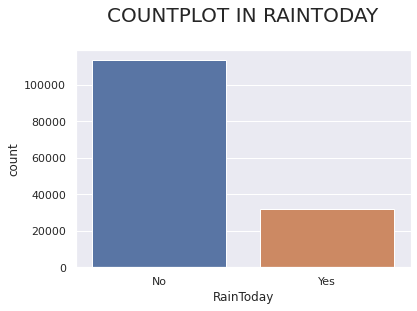

In [49]:
# RainToday
plt.figure(figsize=(6,4))
sns.countplot(x='RainToday', data=rainfall_dataset)
title = 'CountPlot in RainToday\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [50]:
# RainTomorrow column values
rainfall_dataset['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

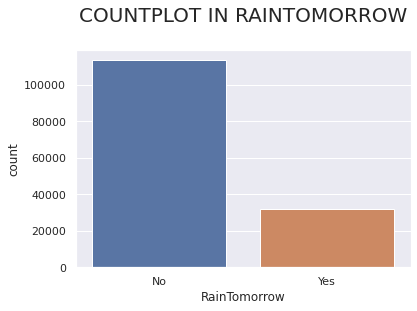

In [51]:
# RainTomorrow
plt.figure(figsize=(6,4))
sns.countplot(x='RainTomorrow', data=rainfall_dataset)
title = 'CountPlot in RainTomorrow\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

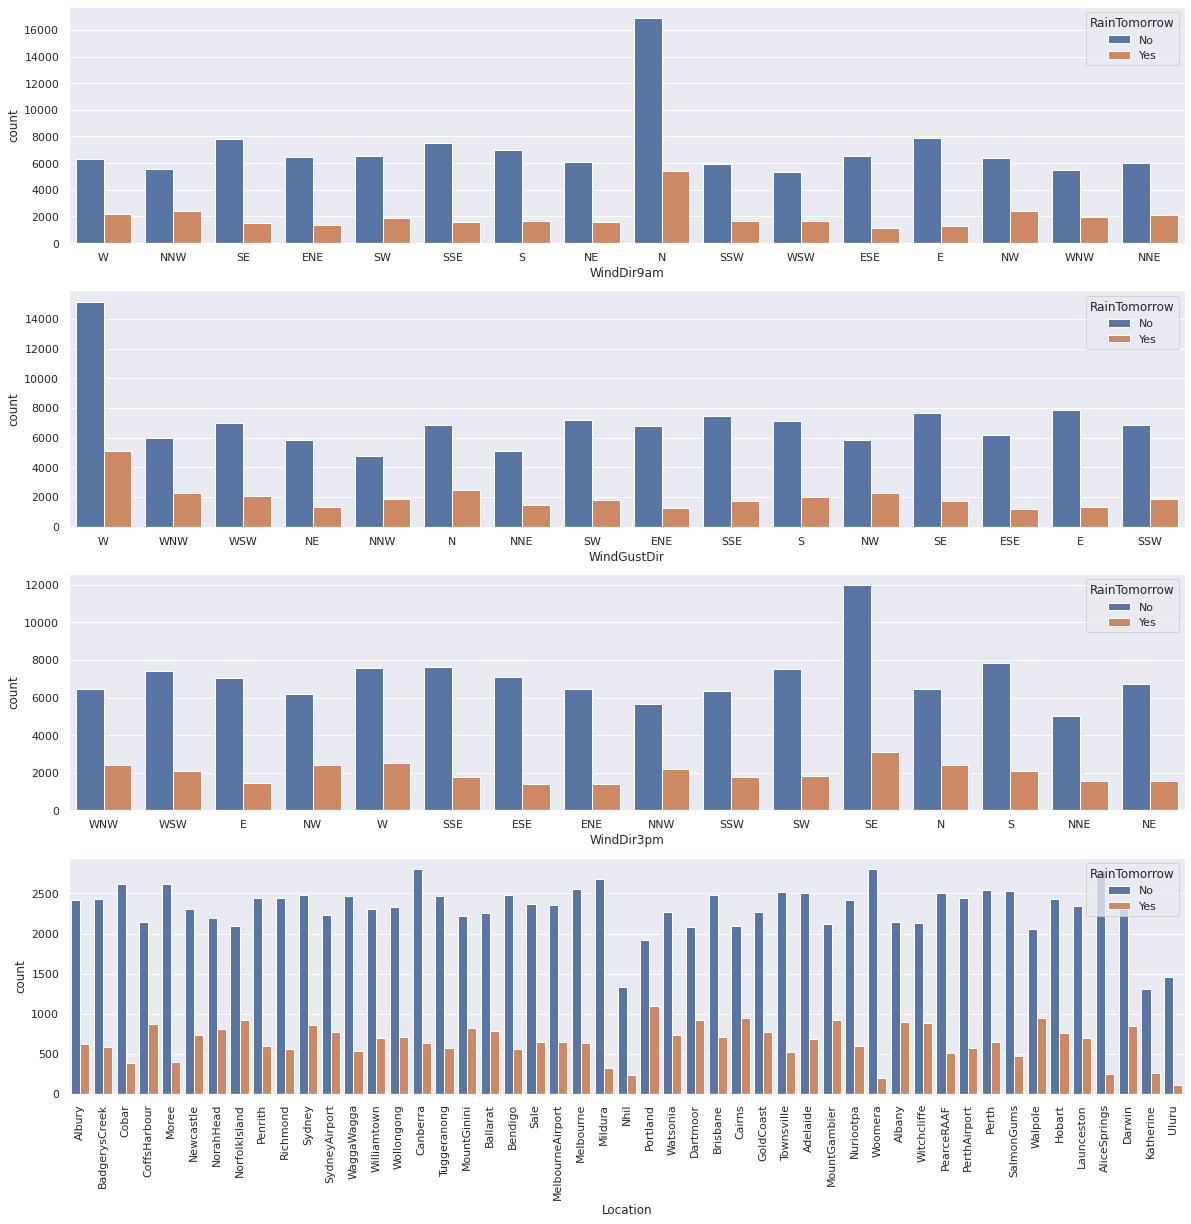

In [52]:
plt.figure(figsize=(20,20))

plt.subplot(4,1,1)
sns.countplot(x=rainfall_dataset.WindDir9am,hue=rainfall_dataset.RainTomorrow)

plt.subplot(4,1,2)
sns.countplot(x=rainfall_dataset.WindGustDir,hue=rainfall_dataset.RainTomorrow)

plt.subplot(4,1,3)
sns.countplot(x=rainfall_dataset.WindDir3pm,hue=rainfall_dataset.RainTomorrow)

plt.subplot(4,1,4)
plt.xticks(rotation=90)
sns.countplot(x=rainfall_dataset.Location,hue=rainfall_dataset.RainTomorrow)

plt.show()

Understanding the correlation between various features in the dataset

In [53]:
correlation = rainfall_dataset.corr()

In [54]:
print(correlation)

                MinTemp   MaxTemp  Rainfall  ...  Cloud3pm   Temp9am   Temp3pm
MinTemp        1.000000  0.733400  0.102706  ...  0.016722  0.897692  0.699211
MaxTemp        0.733400  1.000000 -0.074040  ... -0.212760  0.879170  0.968713
Rainfall       0.102706 -0.074040  1.000000  ...  0.145343  0.011069 -0.077684
Evaporation    0.351321  0.438653 -0.037863  ... -0.145472  0.414592  0.425573
Sunshine       0.051297  0.328931 -0.170973  ... -0.553853  0.208580  0.346685
WindGustSpeed  0.172553  0.065895  0.126446  ...  0.079927  0.145904  0.031884
WindSpeed9am   0.173404  0.014294  0.085925  ...  0.041667  0.127592  0.004476
WindSpeed3pm   0.173058  0.049717  0.056527  ...  0.019813  0.161060  0.027587
Humidity9am   -0.230970 -0.497927  0.221380  ...  0.273314 -0.469641 -0.490709
Humidity3pm    0.005995 -0.498760  0.248905  ...  0.406605 -0.216964 -0.555608
Pressure9am   -0.423584 -0.308309 -0.159055  ... -0.114425 -0.397131 -0.265532
Pressure3pm   -0.433147 -0.396622 -0.119541  ... -0.

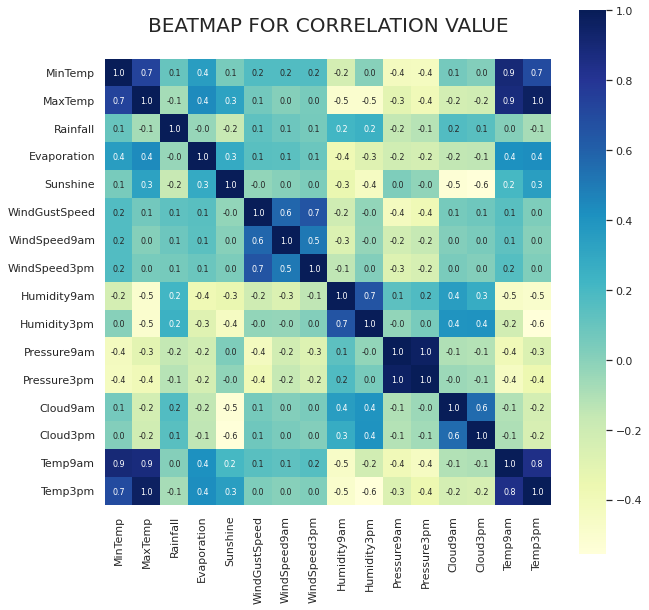

In [55]:
# constructing a beatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='YlGnBu')
title = 'beatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [56]:
rainfall_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [57]:
# convert categorical values to numerical values

rainfall_dataset.replace({'WindGustDir': {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10, 
                                          'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15},}, inplace=True)

rainfall_dataset.replace({'WindDir9am': {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10, 
                                         'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15},}, inplace=True)

rainfall_dataset.replace({'WindDir3pm': {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10, 
                                         'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15},}, inplace=True)

In [58]:
rd = rainfall_dataset.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
rd

RainTomorrow,No,Yes
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [59]:
print("Number of Location: ", len(rainfall_dataset['Location'].unique()))

Number of Location:  49


In [60]:
# convert categorical values to numerical values

rainfall_dataset.replace({'Location': {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,'NorfolkIsland':6,
                                       'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10, 'Darwin':11, 'MountGinini':12, 
                                       'NorahHead':13, 'Ballarat':14, 'GoldCoast':15, 'SydneyAirport':16, 'Hobart':17, 'Watsonia':18,
                                       'Newcastle':19, 'Wollongong':20, 'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24,
                                       'MelbourneAirport':25, 'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
                                       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36, 'Richmond':37,
                                       'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41, 'Moree':42, 'Cobar':43, 'Mildura':44, 
                                       'Katherine':45, 'AliceSprings':46, 'Nhil':47, 'Woomera':48, 'Uluru':49},}, inplace=True)

Label Encoding

In [61]:
encoder = LabelEncoder()

In [62]:
# convert categorical columns to numerical values

rainfall_dataset['RainToday'] = encoder.fit_transform(rainfall_dataset['RainToday'])

rainfall_dataset['RainTomorrow'] = encoder.fit_transform(rainfall_dataset['RainTomorrow'])

After label Encoding

RainToday: 
  1.   NO = 0
  2.   YES = 1

RainTomorrow: 
  1.   NO = 0
  2.   YES = 1

In [63]:
rainfall_dataset['Date'] =pd.to_datetime(rainfall_dataset['Date'])
rainfall_dataset['Date'] = rainfall_dataset['Date'].values.astype(float)
# df2
rainfall_dataset['Date']

0         1.228090e+18
1         1.228176e+18
2         1.228262e+18
3         1.228349e+18
4         1.228435e+18
              ...     
145455    1.498003e+18
145456    1.498090e+18
145457    1.498176e+18
145458    1.498262e+18
145459    1.498349e+18
Name: Date, Length: 145460, dtype: float64

In [64]:
rainfall_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.228090e+18,30,13.4,22.9,0.6,5.468232,7.611178,4,44.0,5,3,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,1.228176e+18,30,7.4,25.1,0.0,5.468232,7.611178,2,44.0,0,6,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,1.228262e+18,30,12.9,25.7,0.0,5.468232,7.611178,5,46.0,5,6,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,1.228349e+18,30,9.2,28.0,0.0,5.468232,7.611178,11,24.0,13,14,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,1.228435e+18,30,17.5,32.3,1.0,5.468232,7.611178,4,41.0,12,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [65]:
rainfall_dataset.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.228090e+18,30,13.4,22.9,0.6,5.468232,7.611178,4,44.0,5,3,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,1.228176e+18,30,7.4,25.1,0.0,5.468232,7.611178,2,44.0,0,6,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,1.228262e+18,30,12.9,25.7,0.0,5.468232,7.611178,5,46.0,5,6,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,1.228349e+18,30,9.2,28.0,0.0,5.468232,7.611178,11,24.0,13,14,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,1.228435e+18,30,17.5,32.3,1.0,5.468232,7.611178,4,41.0,12,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
5,1.228522e+18,30,14.6,29.7,0.2,5.468232,7.611178,2,56.0,5,4,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9,0,0
6,1.228608e+18,30,14.3,25.0,0.0,5.468232,7.611178,4,50.0,7,4,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6,0,0
7,1.228694e+18,30,7.7,26.7,0.0,5.468232,7.611178,4,35.0,11,4,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5,0,0
8,1.228781e+18,30,9.7,31.9,0.0,5.468232,7.611178,0,80.0,13,0,7.0,28.0,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2,0,1
9,1.228867e+18,30,13.1,30.1,1.4,5.468232,7.611178,4,28.0,10,12,15.0,11.0,58.0,27.0,1007.0,1005.7,4.447461,4.50993,20.1,28.2,1,0


In [66]:
# Location column values
rainfall_dataset['Location'].value_counts()

29    3436
10    3344
28    3193
21    3193
26    3193
24    3193
17    3193
11    3193
20    3040
36    3040
15    3040
14    3040
12    3040
39    3040
7     3040
23    3040
5     3040
46    3040
2     3040
30    3040
34    3039
31    3039
19    3039
16    3009
9     3009
8     3009
6     3009
18    3009
4     3009
25    3009
1     3009
22    3009
37    3009
44    3009
43    3009
42    3009
48    3009
38    3009
40    3009
35    3009
33    3009
32    3009
27    3009
3     3006
13    3004
41    3001
45    1578
47    1578
49    1578
Name: Location, dtype: int64

In [67]:
# WindGustDir column values
rainfall_dataset['WindGustDir'].value_counts()

4     20241
12     9418
3      9313
10     9216
15     9181
7      9168
5      9069
9      8967
8      8736
2      8252
1      8122
14     8104
13     7372
11     7133
0      6620
6      6548
Name: WindGustDir, dtype: int64

In [68]:
# WindDir9am column values
rainfall_dataset['WindDir9am'].value_counts()

1     22324
13     9287
15     9176
11     9112
2      8749
10     8659
5      8459
7      8423
3      8129
0      7980
12     7836
9      7671
14     7630
8      7587
4      7414
6      7024
Name: WindDir9am, dtype: int64

In [69]:
# WindDir3pm column values
rainfall_dataset['WindDir3pm'].value_counts()

10    15066
4     10110
8      9926
6      9518
12     9399
9      9354
2      8890
3      8874
0      8610
15     8505
14     8472
11     8263
7      8156
1      7870
13     7857
5      6590
Name: WindDir3pm, dtype: int64

In [70]:
# RainToday column values
rainfall_dataset['RainToday'].value_counts()

0    113580
1     31880
Name: RainToday, dtype: int64

In [71]:
# RainTomorrow column values
rainfall_dataset['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

Splitting the data set

In [72]:
X = rainfall_dataset.drop(['Date', 'RainTomorrow'], axis=1)
Y = rainfall_dataset['RainTomorrow']

In [73]:
print(X)

        Location  MinTemp    MaxTemp  ...  Temp9am  Temp3pm  RainToday
0             30     13.4  22.900000  ...     16.9     21.8          0
1             30      7.4  25.100000  ...     17.2     24.3          0
2             30     12.9  25.700000  ...     21.0     23.2          0
3             30      9.2  28.000000  ...     18.1     26.5          0
4             30     17.5  32.300000  ...     17.8     29.7          0
...          ...      ...        ...  ...      ...      ...        ...
145455        49      2.8  23.400000  ...     10.1     22.4          0
145456        49      3.6  25.300000  ...     10.9     24.5          0
145457        49      5.4  26.900000  ...     12.5     26.1          0
145458        49      7.8  27.000000  ...     15.1     26.0          0
145459        49     14.9  23.221348  ...     15.0     20.9          0

[145460 rows x 21 columns]


In [74]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64


Splitting the data into Training data & Testing Data

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [137]:
print(X.shape, X_train.shape, X_test.shape)

(145460, 21) (116368, 21) (29092, 21)


Machine Learning Model Training

Random Forest

In [138]:
clf_random_forest=RandomForestClassifier()

In [139]:
clf_random_forest.fit(X_train, Y_train)

RandomForestClassifier()

Evaluation

training data

In [140]:
random_forest_train_predictions=clf_random_forest.predict(X_train)

In [141]:
# Accuracy Score
accuracy_random_forest_on_train_data = accuracy_score(Y_train,random_forest_train_predictions)*100

In [142]:
print('Accuracy on train data : ', accuracy_random_forest_on_train_data)

Accuracy on train data :  99.99312525780283


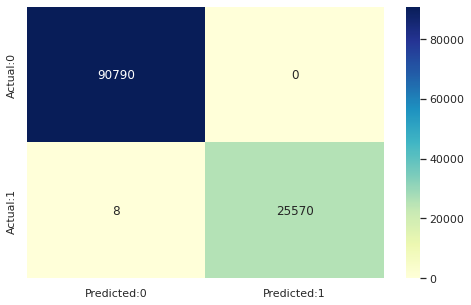

In [143]:
cm=confusion_matrix(Y_train,random_forest_train_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [144]:
print(metrics.classification_report(Y_train, random_forest_train_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90790
           1       1.00      1.00      1.00     25578

    accuracy                           1.00    116368
   macro avg       1.00      1.00      1.00    116368
weighted avg       1.00      1.00      1.00    116368



testing data

In [145]:
random_forest_text_predictions=clf_random_forest.predict(X_test)

In [146]:
# Accuracy Score
accuracy_random_forest_on_test_data = accuracy_score(Y_test,random_forest_text_predictions)*100

In [147]:
print('Accuracy on test data : ', accuracy_random_forest_on_test_data)

Accuracy on test data :  85.93427746459508


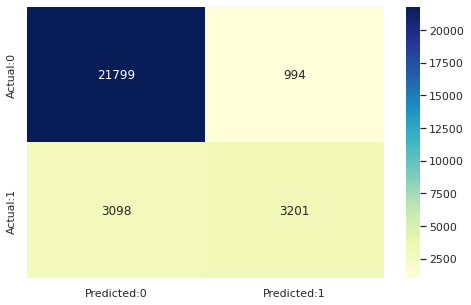

In [148]:
cm=confusion_matrix(Y_test,random_forest_text_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [149]:
print(metrics.classification_report(Y_test, random_forest_text_predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91     22793
           1       0.76      0.51      0.61      6299

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092



In [150]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_forest_text_predictions))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_forest_text_predictions))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_forest_text_predictions))))

Mean_absolute_error:  0.14065722535404923
Mean_squared_error:  0.14065722535404923
Root mean_squared_error:  0.37504296467744763


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7322830103551357

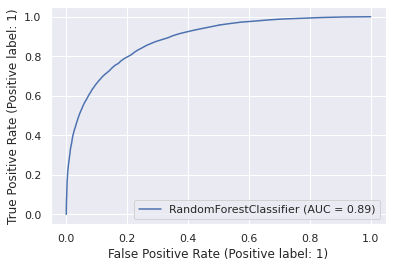

In [151]:
# Receiver Operating Characteristic Curve(Roc curve)
# Area under the ROC Curve
metrics.plot_roc_curve(clf_random_forest, X_test, Y_test)
metrics.roc_auc_score(Y_test, random_forest_text_predictions, average=None)

CatBoostClassifier

In [152]:
cat = CatBoostClassifier()
cat.fit(X_train, Y_train)

Learning rate set to 0.078532
0:	learn: 0.6400128	total: 31.1ms	remaining: 31.1s
1:	learn: 0.5959471	total: 61.2ms	remaining: 30.5s
2:	learn: 0.5595674	total: 90.8ms	remaining: 30.2s
3:	learn: 0.5277835	total: 123ms	remaining: 30.7s
4:	learn: 0.5010624	total: 155ms	remaining: 30.8s
5:	learn: 0.4799531	total: 184ms	remaining: 30.4s
6:	learn: 0.4627721	total: 225ms	remaining: 31.9s
7:	learn: 0.4487423	total: 257ms	remaining: 31.8s
8:	learn: 0.4364368	total: 289ms	remaining: 31.9s
9:	learn: 0.4273164	total: 320ms	remaining: 31.7s
10:	learn: 0.4178875	total: 353ms	remaining: 31.7s
11:	learn: 0.4096628	total: 385ms	remaining: 31.7s
12:	learn: 0.4040814	total: 417ms	remaining: 31.6s
13:	learn: 0.3987110	total: 451ms	remaining: 31.8s
14:	learn: 0.3942149	total: 485ms	remaining: 31.8s
15:	learn: 0.3899591	total: 521ms	remaining: 32.1s
16:	learn: 0.3865578	total: 555ms	remaining: 32.1s
17:	learn: 0.3836029	total: 586ms	remaining: 31.9s
18:	learn: 0.3807476	total: 619ms	remaining: 31.9s
19:	lear

In [153]:
cat_pred = cat.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,cat_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,cat_pred)*100,'\n')
print(classification_report(Y_test,cat_pred))

Confusion matrix : 
 [[21718  1075]
 [ 2823  3476]] 

Accuracy Score :  86.60112745772034 

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     22793
           1       0.76      0.55      0.64      6299

    accuracy                           0.87     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.86      0.87      0.86     29092



In [154]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, cat_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, cat_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, cat_pred))))

Mean_absolute_error:  0.13398872542279663
Mean_squared_error:  0.13398872542279663
Root mean_squared_error:  0.3660447041316083


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7523350107621478

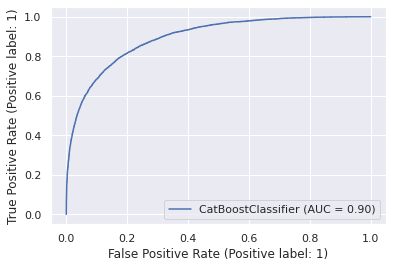

In [155]:
metrics.plot_roc_curve(cat, X_test, Y_test)
metrics.roc_auc_score(Y_test, cat_pred, average=None)

XGBClassifier

In [156]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier()

In [157]:
xgb_pred = xgb.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,xgb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,xgb_pred)*100,'\n')
print(classification_report(Y_test,xgb_pred))

Confusion matrix : 
 [[21726  1067]
 [ 3257  3042]] 

Accuracy Score :  85.13680736972363 

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22793
           1       0.74      0.48      0.58      6299

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



In [158]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, xgb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, xgb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, xgb_pred))))

Mean_absolute_error:  0.14863192630276365
Mean_squared_error:  0.14863192630276365
Root mean_squared_error:  0.38552811350505123


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7180605905533548

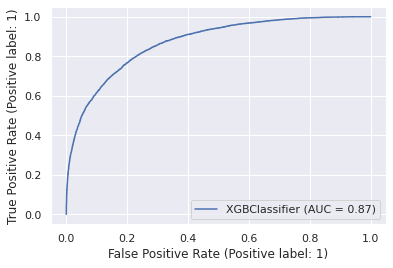

In [159]:
metrics.plot_roc_curve(xgb, X_test, Y_test)
metrics.roc_auc_score(Y_test, xgb_pred, average=None)

LogisticRegression

In [160]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [161]:
log_reg_pred = log_reg.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,log_reg_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,log_reg_pred)*100,'\n')
print(classification_report(Y_test,log_reg_pred))

Confusion matrix : 
 [[21593  1200]
 [ 3348  2951]] 

Accuracy Score :  84.36683624364086 

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22793
           1       0.71      0.47      0.56      6299

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



In [162]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, log_reg_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, log_reg_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, log_reg_pred))))

Mean_absolute_error:  0.15633163756359136
Mean_squared_error:  0.15633163756359136
Root mean_squared_error:  0.3953879582936124


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7079196593551464

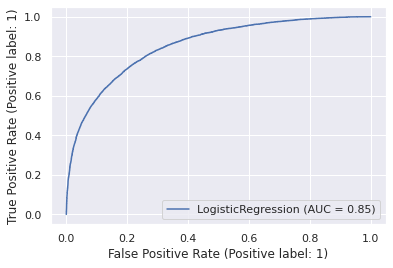

In [163]:
metrics.plot_roc_curve(log_reg, X_test, Y_test)
metrics.roc_auc_score(Y_test, log_reg_pred, average=None)

GaussianNB

In [164]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [165]:
gnb_pred = gnb.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,gnb_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,gnb_pred)*100,'\n')
print(classification_report(Y_test,gnb_pred))

Confusion matrix : 
 [[19590  3203]
 [ 2479  3820]] 

Accuracy Score :  80.46885741784683 

              precision    recall  f1-score   support

           0       0.89      0.86      0.87     22793
           1       0.54      0.61      0.57      6299

    accuracy                           0.80     29092
   macro avg       0.72      0.73      0.72     29092
weighted avg       0.81      0.80      0.81     29092



In [166]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, gnb_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, gnb_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, gnb_pred))))

Mean_absolute_error:  0.1953114258215317
Mean_squared_error:  0.1953114258215317
Root mean_squared_error:  0.4419405229457146


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7329599337848138

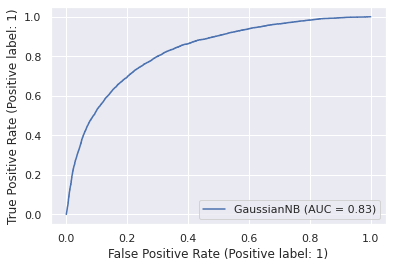

In [167]:
metrics.plot_roc_curve(gnb, X_test, Y_test)
metrics.roc_auc_score(Y_test, gnb_pred, average=None)

KNeighborsClassifier

In [168]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [169]:
knn_pred = knn.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,knn_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,knn_pred)*100,'\n')
print(classification_report(Y_test,knn_pred))

Confusion matrix : 
 [[21375  1418]
 [ 3147  3152]] 

Accuracy Score :  84.30840093496495 

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22793
           1       0.69      0.50      0.58      6299

    accuracy                           0.84     29092
   macro avg       0.78      0.72      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [170]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, knn_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, knn_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, knn_pred))))

Mean_absolute_error:  0.1569159906503506
Mean_squared_error:  0.1569159906503506
Root mean_squared_error:  0.39612623070222275


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7190924028690135

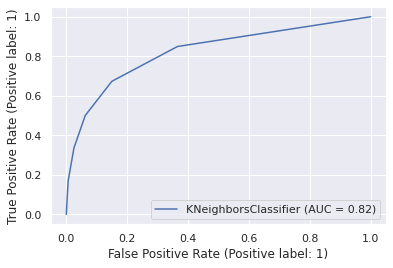

In [171]:
metrics.plot_roc_curve(knn, X_test, Y_test)
metrics.roc_auc_score(Y_test, knn_pred, average=None)

Support Vector Clustering (SVC)

In [172]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [106]:
svc_pred = svc.predict(X_test)
print('Confusion matrix : \n', confusion_matrix(Y_test,svc_pred),'\n')
print('Accuracy Score : ', accuracy_score(Y_test,svc_pred)*100,'\n')
print(classification_report(Y_test,svc_pred))

Confusion matrix : 
 [[21941   693]
 [ 4142  2316]] 

Accuracy Score :  83.3803107383473 

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22634
           1       0.77      0.36      0.49      6458

    accuracy                           0.83     29092
   macro avg       0.81      0.66      0.70     29092
weighted avg       0.83      0.83      0.81     29092



In [114]:
# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, svc_pred))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, svc_pred))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, svc_pred))))

Mean_absolute_error:  0.16619689261652687
Mean_squared_error:  0.16619689261652687
Root mean_squared_error:  0.40767253110373636


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.6640036532163988

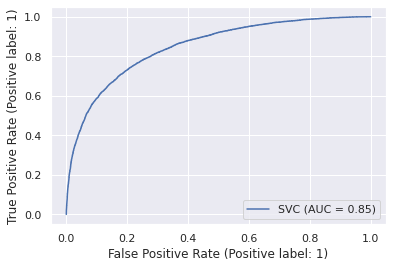

In [107]:
metrics.plot_roc_curve(svc, X_test, Y_test)
metrics.roc_auc_score(Y_test, svc_pred, average=None)